# Priority Queues: implementazioni e analisi
L'obiettivo di questo elaborato consiste nell'effettuare un'analisi inerente a diverse implementazioni delle *priority queue*, in modo da evidenziarne vantaggi e svantaggi e confrontarne le prestazioni anche in relazione alle possibili finalità d'uso. 

### Cos'è una Priority Queue
Una *priority queue* è un Abstract Data Type che permette di rappresentare un insieme di elementi e di definire su di essi una relazione di ordine. Ogni elemento appartenente alla coda possiede un suo indice di priorità che lo caratterizza nel contesto della struttura. A differenza della classica implementazione di una coda, la quale prevede un metodo di estrazione di tipo FIFO (First In First Out), in una priority queue gli elementi vengono estratti dalla struttura in relazione alla stessa priorità: nelle Min-Priority Queue l'estrazione procede per valori crescenti di priorità; al contrario, nelle Max-Priority Queue si seguono valori decrescenti di priorità.

### Applicazioni
Le code a priorità vengono largamente impiegate in informatica e in generale nell'ambito dell'elaborazione di dati per eseguire operazioni complesse quali:
- ordinamento di elementi sulla base della loro priorità.
- ottimizzazioni nell'accesso a risorse condivise, soprattutto in caso di accessi concorrenti e in congestione.
- gestione di attività a schedulazione.
- algoritmi euristici di ricerca.


### Contesto dell'elaborato

Si è scelto di realizzare delle code a priorità massima (Max-Priority Queue) in 3 differenti implementazioni:
- vettore non ordinato (*Unsorted Vector*)
- vettore ordinato (*Sorted Vector*)
- struttura dati *Heap* 

Tali soluzioni sono state analizzate rispetto alle funzionalità di:
 - Inserimento
 - Estrazione
 - *peek* (ritorna l'elemento massimo senza eliminarlo dalla collezione)
 
L'analisi è stata poi contestualizzata rispetto ai possibili campi applicativi delle suddette realizzazioni.

#### Specifiche Hardware & Software del calcolatore
- CPU: Intel Core I5 8th Gen
- RAM: 8 GB
- Sistema Operativo: Windows 10 64 bit
- Linguaggio: C++
- IDE: ISO C++ 11

# 1) Unsorted Vector
Una prima implementazione di coda a priorità è stata realizzata facendo uso di un vettore non ordinato, in cui non è soddisfatta nessuna relazione di ordine tra le priorità degli elementi appartententi alla struttura. In tal modo, l'inserimento non necessita di alcun controllo e il nuovo elemento può essere inserito alla fine della struttura. Tuttavia, avendo preso in considerazione la casistica della Max-Priority Queue, ogni qualvolta è richiesta l'estrazione o la ricerca di un elemento, potrebbe essere necessario scorrere interamente l'array per trovarlo.

## Inserimento
L'operazione di inserimento in un vettore non ordinato è particolarmente banale: dato che la struttura non prevede alcuna relazione d'ordine sugli elementi, è sufficiente inserire il nuovo elemento nell'ultima posizione della queue. Non c'è dunque distinzione tra *worst case* e *best case*, in quanto tale operazione impiega un tempo costante.

#### Codice C++
Per l'implementazione in C++ dell'array non ordinato si è fatto uso della libreria *vector*, la quale fornisce molteplici operazioni di base proprie dei vettori.

```c++
void VectorPriorityQueue::enqueue(int value) {
	array.push_back(value);
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di estrazione, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[500000, 25000000\right]$
- Passo di incremento della cardinalità: $unit=500000$
- Numero di operazioni per ogni passo di cardinalità: $med=5$
- Iterazioni di operazione: $iter=50$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 5 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo nel caso specifico del worst case.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
import pathlib

%config InlineBackend.figure_format = 'retina'

path = str(pathlib.Path().absolute())


In [2]:
df_unsort_vector_insert = pd.read_csv(path+"/Unsorted_Vector_Insert.csv", sep = '\t')

df_unsort_vector_insert.head()

Card  Time1  Time2  Time3  Time4  Time5
0   500000    100    100    100    100    100
1  1000000    100      0      0      0    100
2  1500000      0    100    100    100    100
3  2000000    100    100    100    100    100
4  2500000    100    100      0    100    100

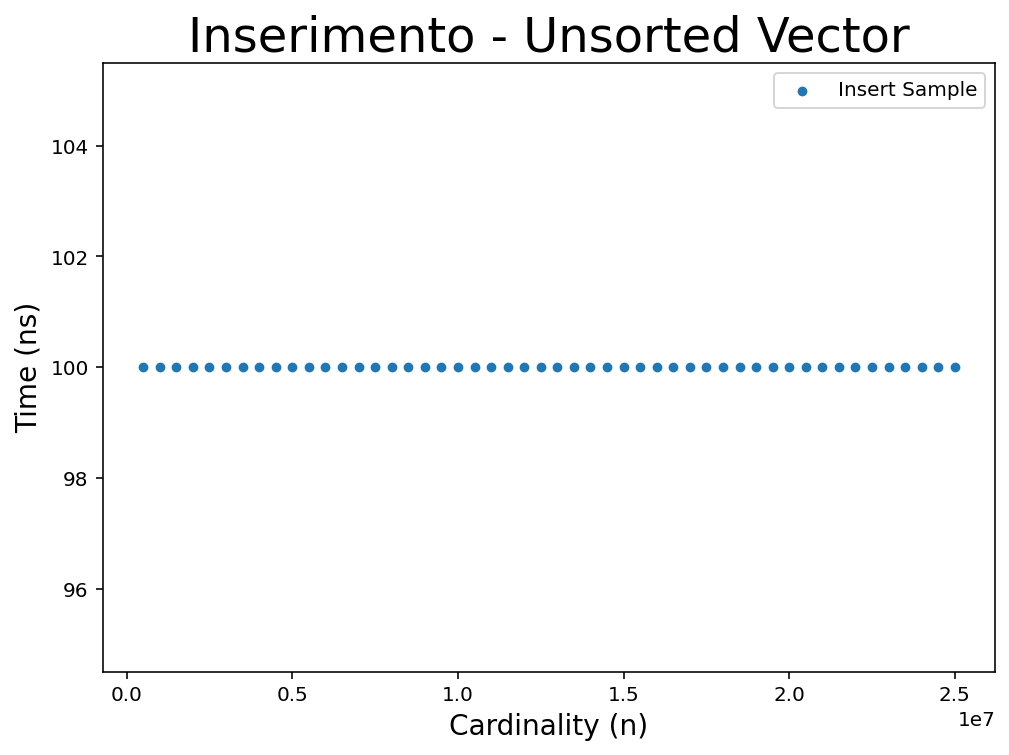

In [3]:
df_median1 = df_unsort_vector_insert.drop(columns = ['Card'])
df_median1 = df_median1.replace(to_replace= 0, value='NaN')
df_median1 = df_median1.median(axis=1,  skipna = True)
df_unsort_vector_insert['Time_m'] = np.array(df_median1)
df_unsort_vector_insert = df_unsort_vector_insert.drop(columns = ['Time1','Time2','Time3','Time4','Time5'])

ax = df_unsort_vector_insert.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Inserimento - Unsorted Vector', size=24)
plt.legend(labels=['Insert Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Dalla rappresentazione grafica si evince nettamente che l'operazione di inserimento impiega un tempo costante pari a circa 100 ns: la complessità temporale asintotica di tale operazione è $O(1)$.

## Estrazione - *worst case*
Nell'ambito dell'operazione di estrazione in un Unsorted Vector, si è scelto di analizzare esclusivamente il *worst case*, ossia la circostanza in cui l'elemento che si intende estrarre è collocato in ultima posizione nell'array. È necessario scorrere interamente il vettore per ricercare l'elemento desiderato.

#### Codice C++
Per l'implementazione in C++ dell'array non ordinato si è fatto uso della libreria *vector*, la quale fornisce molteplici operazioni di base proprie dei vettori.

```c++
int VectorPriorityQueue::dequeueMax() {
	if (isEmpty()) {
        cout<<"Nothing in queue.\n";
        return 0;
    }
    
    int loc = 0;
    int first = array[loc];
    
    for (int i = 1; i < array.size(); i++) {
        if (array[i] > first) {
            first = array[i];
            loc = i;
        }
    }
    
    array.erase(array.begin()+loc);
    return first;
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di estrazione, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[500000, 25000000\right]$
- Passo di incremento della cardinalità: $unit=500000$
- Numero di operazioni per ogni passo di cardinalità: $med=5$
- Iterazioni di operazione: $iter=50$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 5 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo nel caso specifico del worst case.

In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%config InlineBackend.figure_format = 'retina'

In [5]:
df_unsort_vector_extract = pd.read_csv(path+"/Unsorted_Vector_Extract.csv", sep = '\t')

df_unsort_vector_extract.head()

Card       Time1       Time2       Time3       Time4       Time5
0   500000   3232600.0   3194900.0   3196400.0   3212800.0   3215600.0
1  1000000   6398500.0   6390600.0   6396800.0   6405400.0   6446800.0
2  1500000   9652100.0   9622700.0   9606600.0   9633000.0   9634400.0
3  2000000  12807000.0  12813600.0  12820800.0  12824500.0  12829000.0
4  2500000  16015900.0  16046100.0  15996800.0  16034500.0  16019900.0

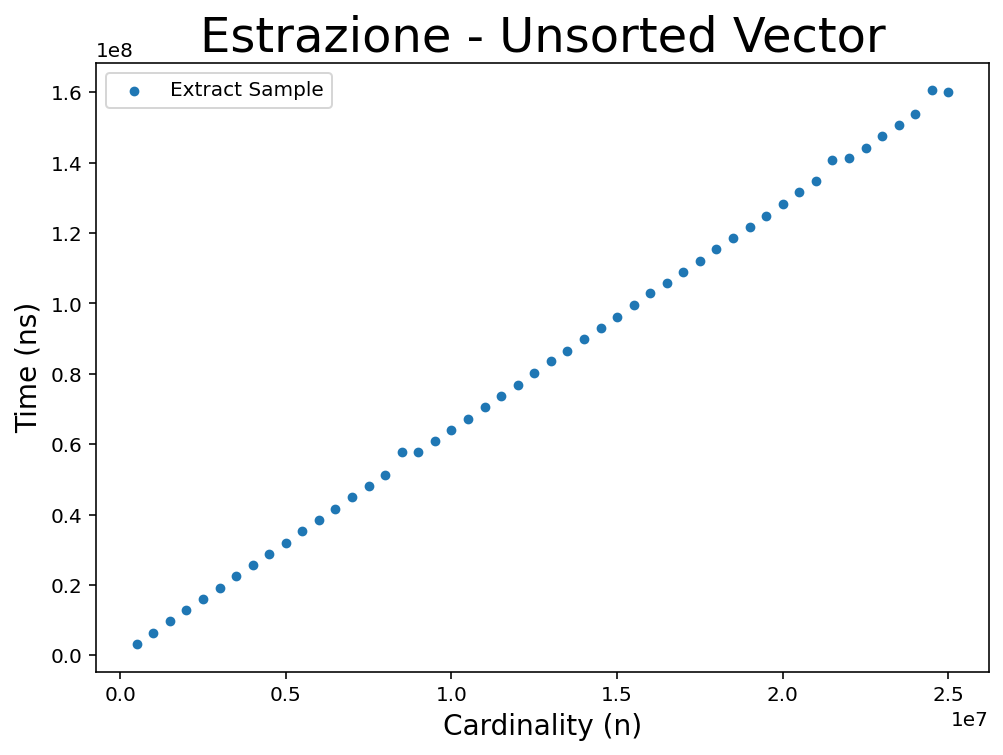

In [6]:
df_median = df_unsort_vector_extract.drop(columns = ['Card'])
df_median = df_median.replace(to_replace= 0, value='NaN')
df_median = df_median.median(axis=1,  skipna = True)
df_unsort_vector_extract['Time_m'] = np.array(df_median)
df_unsort_vector_extract = df_unsort_vector_extract.drop(columns = ['Time1','Time2','Time3','Time4','Time5'])

ax = df_unsort_vector_extract.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Estrazione - Unsorted Vector', size=24)
plt.legend(labels=['Extract Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

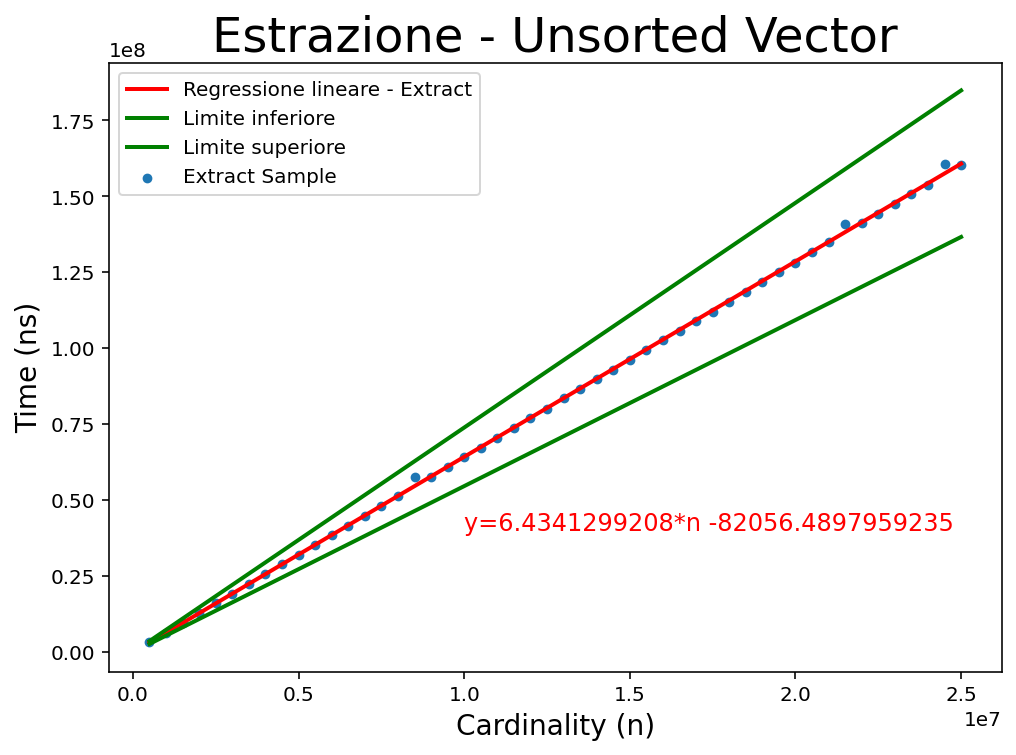

In [7]:
ax = df_unsort_vector_extract.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
m, q = np.polyfit(df_unsort_vector_extract['Card'], df_unsort_vector_extract['Time_m'], 1)

curvey=m*df_unsort_vector_extract.Card+q
curveup=curvey*1.15
curvedown=curvey*0.85

plt.plot(df_unsort_vector_extract.Card,m*df_unsort_vector_extract.Card+q, color='red', linewidth=2)
plt.plot(df_unsort_vector_extract['Card'],curveup,'green', linewidth=2)
plt.plot(df_unsort_vector_extract['Card'],curvedown,'green', linewidth=2)
plt.text(1e7,0.4e8,'y={:.10f}*n {:.10f}'.format(m,q),color='red',size=12)
plt.legend(labels=['Regressione lineare - Extract', 'Limite inferiore', 'Limite superiore', 'Extract Sample'])
plt.title('Estrazione - Unsorted Vector', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Dalla **regressione lineare** sopra effettuata, ne risulta che i campioni dell'operazione di estrazione sono interpolati dalla retta di equazione:<br>
<center>$y = 6.434129920768306 \cdot n - 82056.48979592347$</center>

A questo punto, utilizzando i coefficienti:
- $c_1 = 1.15$
- $c_2 = 0.85$

e fissando un valore di n pari a:
- $n_0 = 0.1\cdot10^7$

ne consegue che l'andamento asintotico dell'algoritmo è compreso nella fascia:<br>
<center>$0 < c_1 \cdot y(n) < T(n) < c_2 \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0$</center>

Da cui risulta che la complessità temporale asintotica di estrazione da un Unsorted Vector nel *worst case* è $\Theta(n)$.  

Ne consegue che la complessità temporale asintotica, in generale, è $O(n)$.

## Peek - *worst case*
Ragionando sull'operazione di peek, si può facilmente notare che il caso peggiore di tale operazione è riconducibile di fatto al worst case dell'operazione di estrazione. Di conseguenza, anche in questo caso la complessità temporale asintotica è $O(n)$.

# 2) Sorted Vector
È possibile implementare una priority queue attraverso un **array ordinato in senso decrescente**. 

## Inserimento
L'operazione di inserimento in un vettore **ordinato in senso decrescente** è articolata in due fasi:
 - in un primo momento viene ricercata la locazione in cui l'elemento deve essere inserito, scorrendo dalla testa alla coda del vettore.
 - successivamente, a partire dall'ultima locazione del vettore, tutti gli elementi sono traslati in avanti per liberare una posizione per il nuovo elemento.
 
 Dato che la prima ricerca parte dalla prima locazione si ferma alla locazione di inserimento, mentre il secondo ciclo parte dall'ultima posizione e arriva alla locazione stessa, risulta che la complessità temporale asintotica è $\Theta(n)$ in ogni caso.

#### Codice C++
Per l'implementazione in C++ dell'array ordinato si è fatto uso della libreria *vector*, la quale fornisce molteplici operazioni di base proprie dei vettori.

```c++
void VectorPriorityQueue::Sorted_Insert(int num) {
	int pos=0;
	int size=array.size();
	array.push_back(0);
	
	while(pos<size && num<array[pos])
		++pos;

	for(int k=size;k>pos;k--){
		array[k]=array[k-1];
	}
	
	array[pos]=num;
		
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di estrazione, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[2500, 2000000\right]$
- Passo di incremento della cardinalità: $unit=2500$
- Numero di operazioni per ogni passo di cardinalità: $med=3$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 3 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

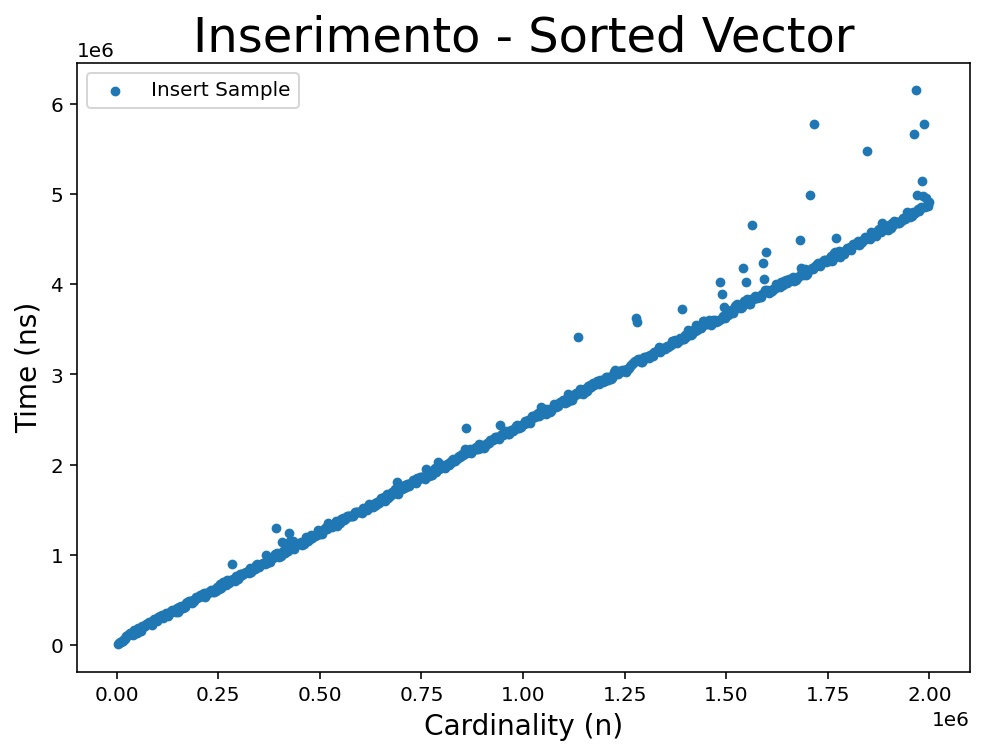

In [8]:
df_sortedv_ins = pd.read_csv(path+"/Sorted_Vector_Insert.csv", sep = '\t')

df_median2 = df_sortedv_ins.drop(columns = ['Card'])
df_median2 = df_median2.replace(to_replace=0.0, value='NaN')
df_median2 = df_median2.median(axis=1,  skipna = True)
df_sortedv_ins['Time_m'] = np.array(df_median2)
df_sortedv_ins = df_sortedv_ins.drop(columns = ['Time1','Time2','Time3'])

ax = df_sortedv_ins.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Inserimento - Sorted Vector', size=24)
plt.legend(labels=['Insert Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

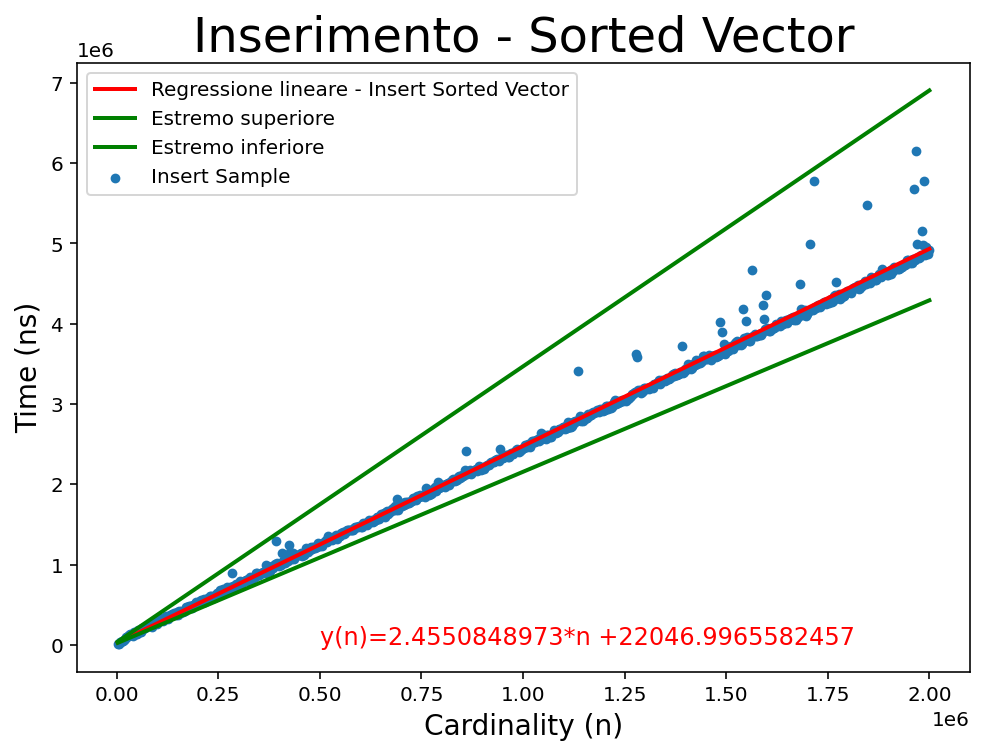

In [9]:
ax = df_sortedv_ins.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))

from scipy.optimize import curve_fit
def func(x, p1,p2):
  return p1*x+p2

popt, pcov = curve_fit(func, df_sortedv_ins['Card'], df_sortedv_ins['Time_m'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_sortedv_ins['Card'],p1,p2)
curveup=curvey*1.4
curvedown=curvey*0.87

plt.plot(df_sortedv_ins['Card'],curvey,'r', linewidth=2)
plt.plot(df_sortedv_ins['Card'],curveup,'green', linewidth=2)
plt.plot(df_sortedv_ins['Card'],curvedown,'green', linewidth=2)
plt.text(0.5e6,0,'y(n)={:.10f}*n +{:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - Insert Sorted Vector','Estremo superiore','Estremo inferiore','Insert Sample'])
plt.title('Inserimento - Sorted Vector', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Tale regressione ha restituito la curva in rosso, caratterizzata dai seguenti coefficienti:<br>
<center>$y(n) = 2.455084897323325 \cdot n + 22046.996558245653$</center>

A questo punto, utilizzando i coefficienti:
- $c_1 = 1.4$
- $c_2 = 0.87$

e fissando un valore di n pari a:
- $n_0 = 0.25\cdot10^6$

ne consegue che l'andamento asintotico dell'algoritmo è compreso nella fascia:<br>
<center>$0 < c_1 \cdot y(n) < T(n) < c_2 \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0$</center>

Da cui risulta che la complessità temporale asintotica di inserimento in un Sorted Vector è $\Theta(n)$.  

## Estrazione
L'operazione di estrazione dell'elemento massimo in un vettore **ordinato in senso decrescente** consiste nella restituzione del primo elemento dell'array e nella traslazione di tutti gli elementi verso sinistra di una locazione. Anche in tal caso risulta che la complessità temporale asintotica è $\Theta(n)$.

#### Codice C++
Per l'implementazione in C++ dell'array ordinato si è fatto uso della libreria *vector*, la quale fornisce molteplici operazioni di base proprie dei vettori.

```c++
int VectorPriorityQueue::Sorted_ExtractMax() {
	
	int x=array[0];
	int size = array.size();

	for(int k=0;k<size;k++){
		array[k]=array[k+1];
	}
	array.resize(array.size()-1);
	
	return x;
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di estrazione, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[2500, 2000000\right]$
- Passo di incremento della cardinalità: $unit=2500$
- Numero di operazioni per ogni passo di cardinalità: $med=3$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 3 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

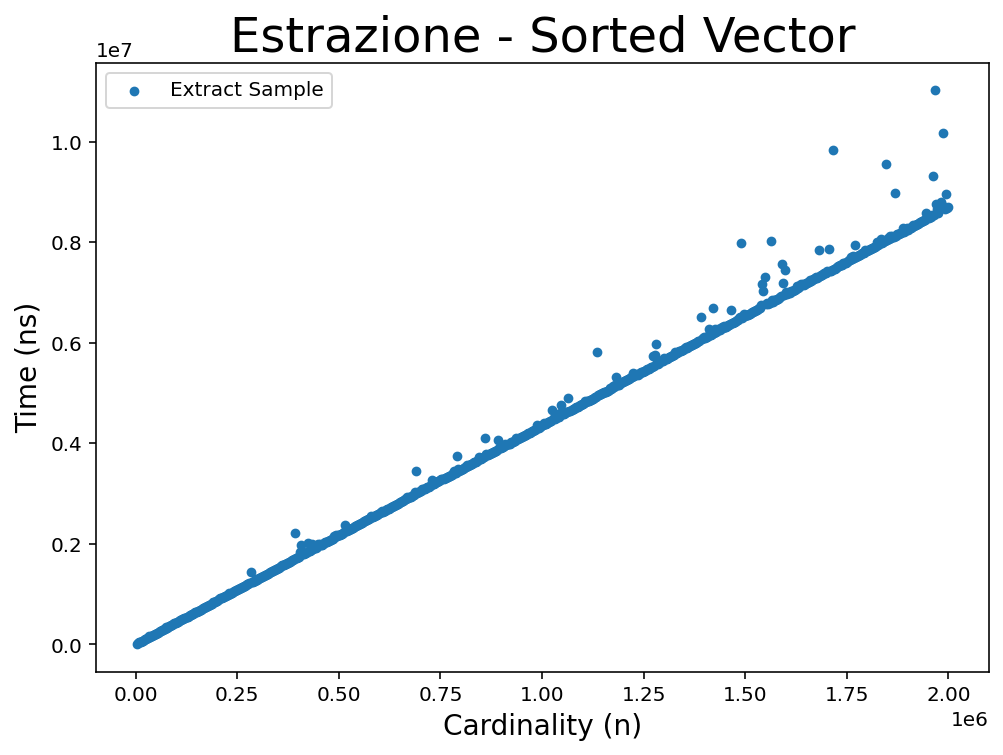

In [10]:
df_sortedv_ext = pd.read_csv(path+"/Sorted_Vector_Extract.csv", sep = '\t')

df_median2 = df_sortedv_ext.drop(columns = ['Card'])
df_median2 = df_median2.replace(to_replace=0.0, value='NaN')
df_median2 = df_median2.median(axis=1,  skipna = True)
df_sortedv_ext['Time_m'] = np.array(df_median2)
df_sortedv_ext = df_sortedv_ext.drop(columns = ['Time1','Time2','Time3'])

ax = df_sortedv_ext.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Estrazione - Sorted Vector', size=24)
plt.legend(labels=['Extract Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

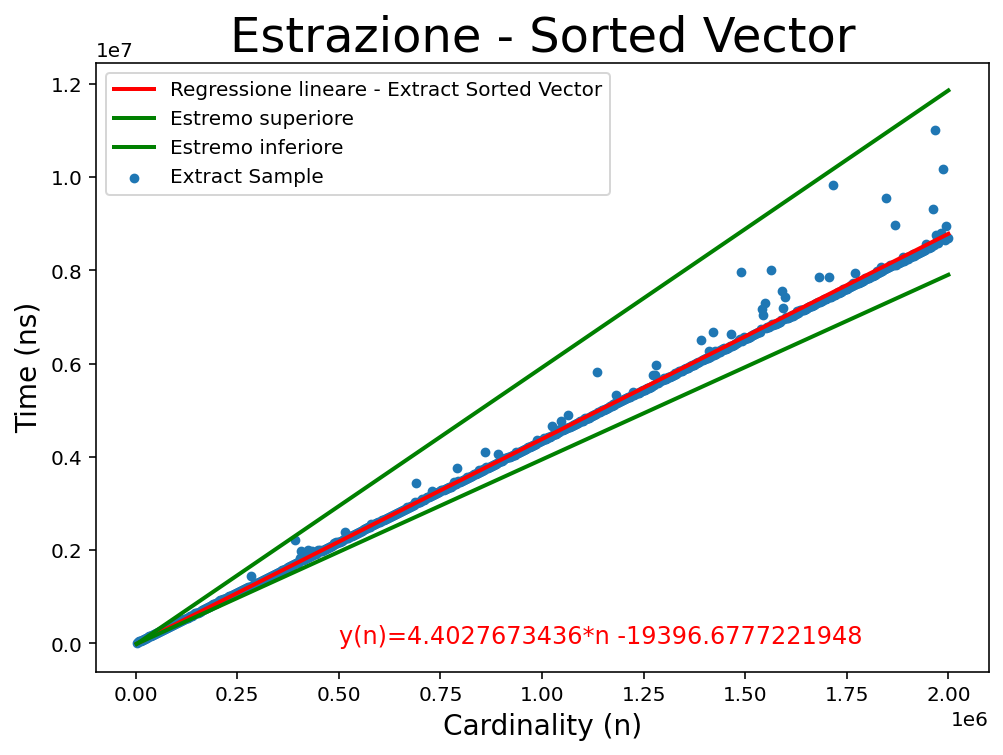

In [11]:
ax = df_sortedv_ext.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))

from scipy.optimize import curve_fit
def func(x, p1,p2):
  return p1*x+p2

popt, pcov = curve_fit(func, df_sortedv_ext['Card'], df_sortedv_ext['Time_m'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_sortedv_ext['Card'],p1,p2)
curveup=curvey*1.35
curvedown=curvey*0.9

plt.plot(df_sortedv_ext['Card'],curvey,'r', linewidth=2)
plt.plot(df_sortedv_ext['Card'],curveup,'green', linewidth=2)
plt.plot(df_sortedv_ext['Card'],curvedown,'green', linewidth=2)
plt.text(0.5e6,0,'y(n)={:.10f}*n {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - Extract Sorted Vector','Estremo superiore','Estremo inferiore','Extract Sample'])
plt.title('Estrazione - Sorted Vector', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Tale regressione ha restituito la curva in rosso, caratterizzata dai seguenti coefficienti:<br>
<center>$y(n) = 4.402767343550147 \cdot n - 19396.677722194818$</center>

A questo punto, utilizzando i coefficienti:
- $c_1 = 1.3$
- $c_2 = 0.9$

e fissando un valore di n pari a:
- $n_0 = 0.5\cdot10^6$

ne consegue che l'andamento asintotico dell'algoritmo è compreso nella fascia:<br>
<center>$0 < c_1 \cdot y(n) < T(n) < c_2 \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0$</center>

Da cui risulta che la complessità temporale asintotica di inserimento in un Sorted Vector è $\Theta(n)$.  

## Peek
L'operazione di peek in un vettore **ordinato in senso decrescente** consiste nella restituzione del primo elemento dell'array. In tal caso, quindi, la complessità temporale asintotica è $O(1)$.

#### Codice C++
Per l'implementazione in C++ dell'array ordinato si è fatto uso della libreria *vector*, la quale fornisce molteplici operazioni di base proprie dei vettori.

```c++
int VectorPriorityQueue::Sorted_Peek() {
	
	return array[0];
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di estrazione, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[2500, 2000000\right]$
- Passo di incremento della cardinalità: $unit=2500$
- Numero di operazioni per ogni passo di cardinalità: $med=3$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 3 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

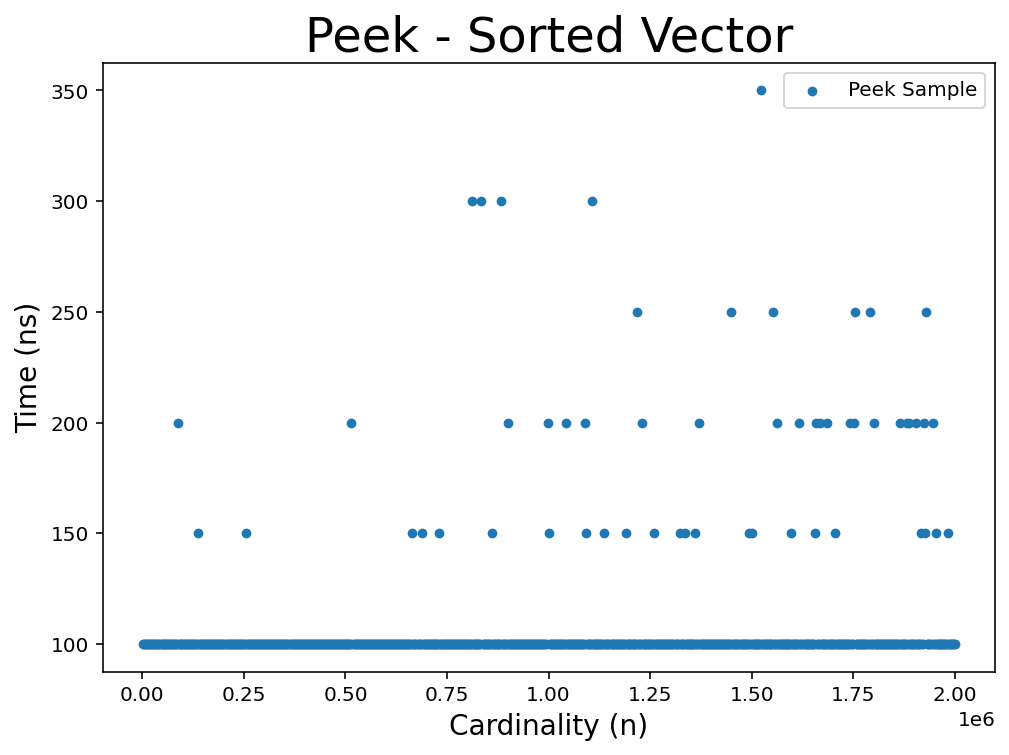

In [12]:
df_sortedv_ins = pd.read_csv(path+"/Sorted_Vector_Peek.csv", sep = '\t')

df_median2 = df_sortedv_ins.drop(columns = ['Card'])
df_median2 = df_median2.replace(to_replace=0, value='NaN')
df_median2 = df_median2.median(axis=1,  skipna = True)
df_sortedv_ins['Time_m'] = np.array(df_median2)
df_sortedv_ins = df_sortedv_ins.drop(columns = ['Time1','Time2','Time3'])

ax = df_sortedv_ins.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Peek - Sorted Vector', size=24)
plt.legend(labels=['Peek Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

La rappresentazione grafica non lascia dubbi sulla complessità temporale, che è $O(1)$.

# 3) Max - Heap
Un heap binario è una struttura di dati heap che assume la forma di un albero binario. Gli elementi dell'Heap sono memorizzati in un vettore in modo da verificarne la proprietà fondamentale.

Gli heap binari sono un modo comune per implementare le priority queue.

Un heap binario è definito come un albero binario con due vincoli aggiuntivi:
- Proprietà *Shape*: un heap binario è un albero binario completo; cioè, tutti i livelli dell'albero, tranne forse l'ultimo (il più profondo) sono completamente riempiti e, se l'ultimo livello dell'albero non è completo, i nodi di quel livello sono riempiti da sinistra a destra.
- Proprietà *Heap*: la chiave memorizzata in ciascun nodo è maggiore o uguale a (≥) o minore o uguale a (≤) delle chiavi nei figli del nodo, secondo un ordine totale.

I vantaggi offerti dalla struttura dati Heap consistono dunque nell'unione delle proprietà comuni dei Binary Search Tree (tempi di esecuzione logaritmici) e della memorizzazione efficiente garantita dagli array.

Nel caso in esame di coda a priorità massima, si è scelto di fare uso di un Max-Heap.
È presentato in primo luogo il modo classico di costruzione di un Max-Heap, successivamente è riportata la prima applicazione "storica" di tale ADT (*HeapSort*) ed infine sono presentati i vantaggi nell'implementazione di una priority queue tramite un Heap.

## Costruire un Heap - BuildMaxHeap
Il metodo più veloce per costruire un Heap consiste nell'inserire arbitrariamente gli elementi in un albero binario, rispettando la proprietà Shape (l'albero è rappresentabile equivalentemente da un array). Quindi, partendo dal livello più basso e procedendo verso l'alto, sposta la radice di ogni sottostruttura verso il basso come nell'algoritmo di eliminazione fino al ripristino della proprietà heap. Più specificamente se tutti i sotto-alberi iniziano a una certa altezza $h$ sono già stati "heapified" (il livello più basso corrispondente a $h = 0$), gli alberi in altezza $h + 1$ può essere heapified inviando la radice lungo il percorso dei figli con il massimo valore durante la creazione di un max-heap. Questo processo richiede $O(h)$ operazioni (swap) per nodo. In questo metodo la maggior parte dell'heapification avviene nei livelli inferiori. Dal momento che l'altezza dell'heap è ${\displaystyle \lfloor \log n \rfloor}$, il numero di nodi in altezza $h$ è ${\displaystyle \leq {\frac {2 ^ {\lfloor \log n \rfloor}} {2 ^ {h}}} \leq {\frac {n} {2 ^ {h}}}}$. 

Pertanto, il costo di rendere heap tutti i sotto-alberi è:

${\displaystyle \sum_{h=0}^{\lfloor \log n \rfloor} {\frac {n} {2 ^ {h}}}{O(h)} = O\biggl(n \cdot \sum_{h=0}^{\lfloor \log n \rfloor}{\frac {h} {2 ^ {h}}}\biggr) \leq O\biggl(n \cdot \sum_{h=0}^{\infty}{\frac {h} {2 ^ {h}}}\biggr) = O(2n) = O(n)}$ 

Dunque, la complessità asintotica di BuildMaxHeap è $O(n)$.

#### Codice C++

```c++
void HeapPriorityQueue::BuildMaxHeap() {
	int HeapSize = heap_array.size();
	for(int i = (heap_array.size() - 1) / 2; i >= 0; i--)
	{
		MaxHeapify(i, &HeapSize);
	}
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di BuildMaxHeap, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[5000, 4000000\right]$
- Passo di incremento della cardinalità: $unit=5000$
- Numero di operazioni per ogni passo di cardinalità: $med=5$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 5 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

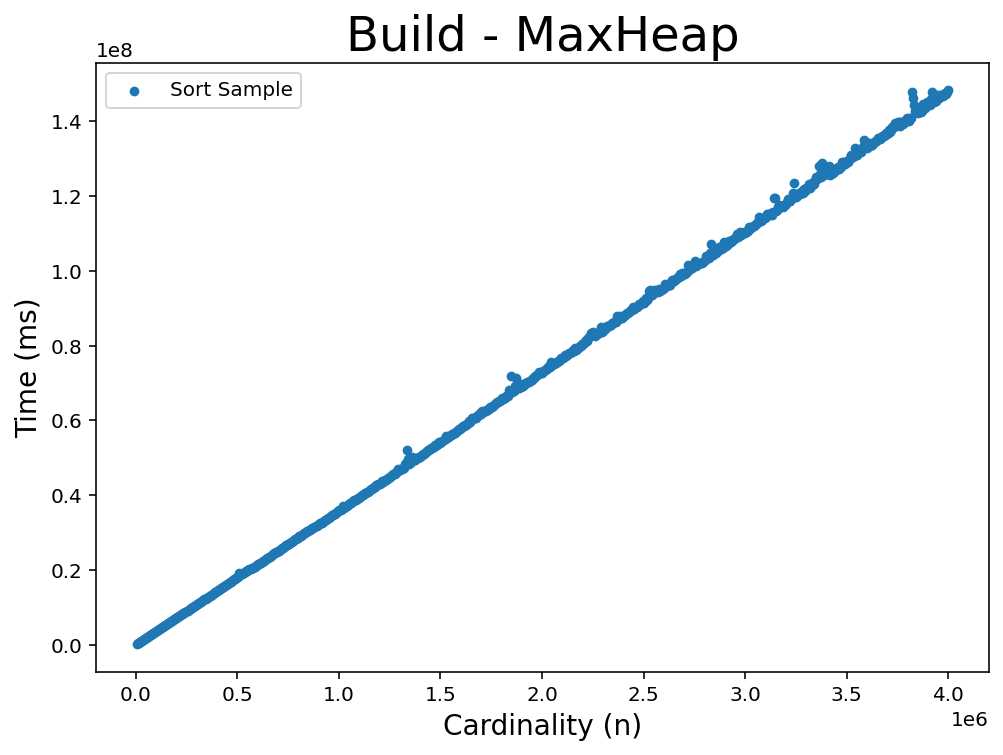

In [13]:
df_build_heap = pd.read_csv(path+"/Build_Max_Heap.csv", sep = ';')

df_build_heap.head()


df_median2 = df_build_heap.drop(columns = ['Card'])
df_median2 = df_build_heap.replace(to_replace=0.0, value='NaN')
df_median2 = df_build_heap.median(axis=1,  skipna = True)
df_build_heap['Time_m'] = np.array(df_median2)
df_build_heap = df_build_heap.drop(columns = ['Time1','Time2','Time3','Time4', 'Time5'])

ax = df_build_heap.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Build - MaxHeap', size=24)
plt.legend(labels=['Sort Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ms)', size=14);

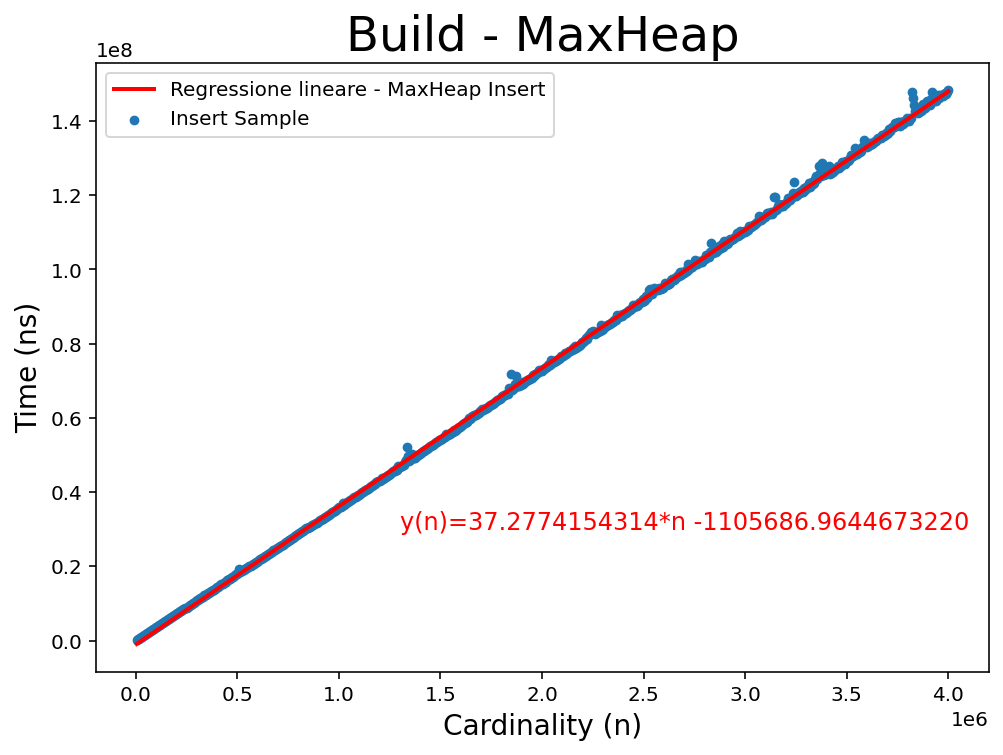

In [14]:
from scipy.optimize import curve_fit
def func(x, p1,p2):
  return p1*x+p2

popt, pcov = curve_fit(func, df_build_heap['Card'], df_build_heap['Time_m'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_build_heap['Card'],p1,p2)


ax = df_build_heap.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))

plt.plot(df_build_heap['Card'],curvey,'r', linewidth=2)
plt.text(1.3e6,0.3e8,'y(n)={:.10f}*n {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - MaxHeap Insert','Insert Sample'])
plt.title('Build - MaxHeap', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Dalla **regressione lineare** sopra effettuata, ne risulta che i campioni dell'operazione di costruzione dell'Heap sono interpolati perfettamente dalla retta di equazione:<br>
<center>$y = 37.277415431427045 \cdot n - 1105686.964467322$</center>
Da cui consegue che la complessità temporale asintotica è $O(n)$.

## Heap Sort
Nonostante non riguardi l'implementazione di code a priorità, è riportata la prima applicazione "storica" della struttura dati Heap, ossia HeapSort. Un heap è infatti in grado di ordinare un array in tempo $n \cdot log(n)$ e risulta particolarmente efficiente in quanto prevede un ordinamento sul posto.

#### Codice C++

```c++
void HeapPriorityQueue::HeapSort() {
	BuildMaxHeap();
	int HeapSize = heap_array.size();
	for(int i = heap_array.size() - 1; i >= 1; i--)
	{
		heap_array[0] = heap_array[0]^heap_array[i];
		heap_array[i] = heap_array[0]^heap_array[i];
		heap_array[0] = heap_array[0]^heap_array[i];
		HeapSize--;
		MaxHeapify(0, &HeapSize);
	}
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di BuildMaxHeap, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[5000, 4000000\right]$
- Passo di incremento della cardinalità: $unit=5000$
- Numero di operazioni per ogni passo di cardinalità: $med=5$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 5 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

In [15]:
df_heap_sort = pd.read_csv(path+"/Heap_Sort.csv", sep = ';')

df_heap_sort.head()

Card       Time1       Time2       Time3
0   5000   2041900.0   5067000.0   4393100.0
1  10000   4602300.0  11045700.0   6340000.0
2  15000   6928700.0  11543600.0  12267600.0
3  20000  10470300.0  19347700.0  20601300.0
4  25000  12448700.0  24926100.0  27805300.0

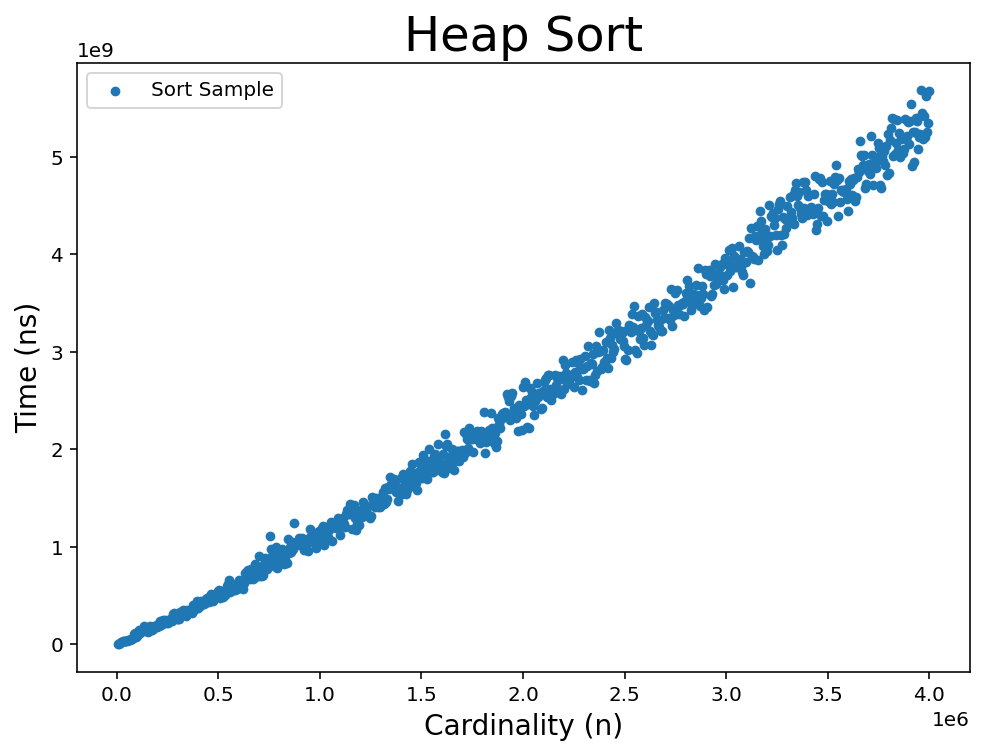

In [16]:
df_median2 = df_heap_sort.drop(columns = ['Card'])
df_median2 = df_median2.replace(to_replace=0.0, value='NaN')
df_median2 = df_median2.median(axis=1,  skipna = True)
df_heap_sort['Time_m'] = np.array(df_median2)
df_heap_sort = df_heap_sort.drop(columns = ['Time1','Time2','Time3'])

ax = df_heap_sort.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Heap Sort', size=24)
plt.legend(labels=['Sort Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Per analizzarne la complessità asintotica, è stata realizzata una **regressione lineare logaritmica**, impostando per l'interpolazione la seguente funzione:<br>
<center>$y = p_1 \cdot n log(n) + p_2$</center>

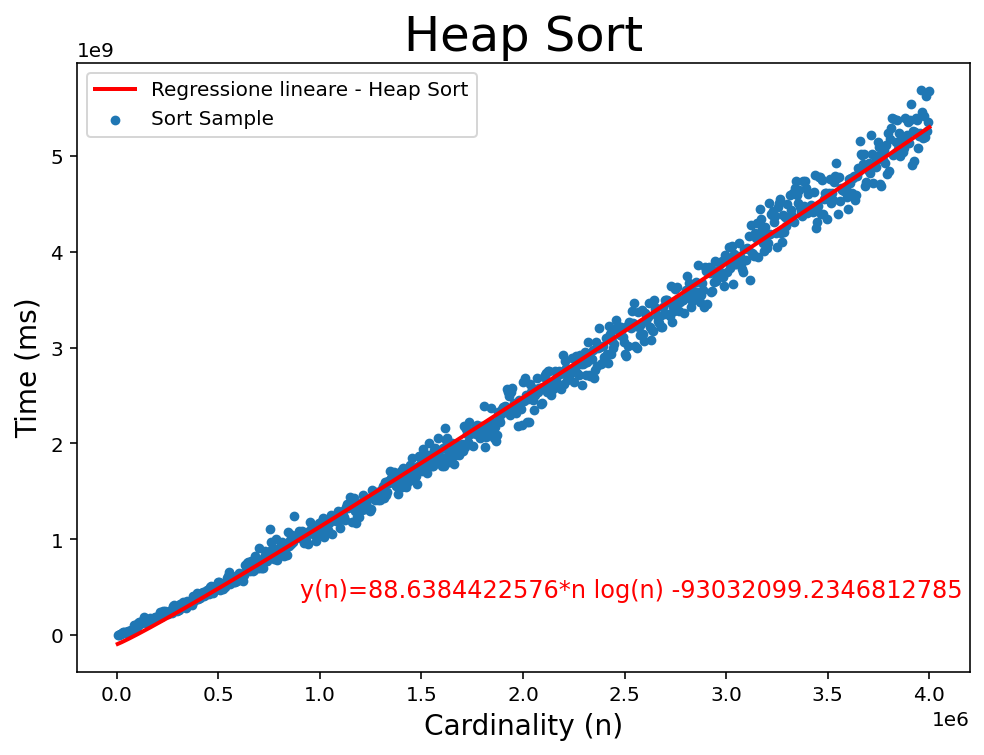

In [17]:
ax = df_heap_sort.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))

from scipy.optimize import curve_fit
def func(x, p1,p2):
    return p1*np.log(x)*x+p2

popt, pcov = curve_fit(func, df_heap_sort['Card'], df_heap_sort['Time_m'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_heap_sort['Card'],p1,p2)

plt.plot(df_heap_sort['Card'],curvey,'r', linewidth=2)
plt.text(0.9e6,0.4e9,'y(n)={:.10f}*n log(n) {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - Heap Sort','Sort Sample'])
plt.title('Heap Sort', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ms)', size=14);

Tale regressione ha restituito la curva in rosso, caratterizzata dai seguenti coefficienti:<br>
<center>$y(n) = 88.63844225764973 \cdot n log(n) - 93032099.23468128$</center>

A questo punto, utilizzando il coefficiente:
- $c = 1.15$

e fissando un valore di n pari a:
- $n_0 = 1\cdot10^6$

ne consegue che l'andamento asintotico dell'algoritmo è compreso nella fascia:<br>
<center>$0 < T(n) < c \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0$</center>

Da cui risulta che la complessità temporale asintotica di HeapSort è $O(n\cdot log(n))$.  

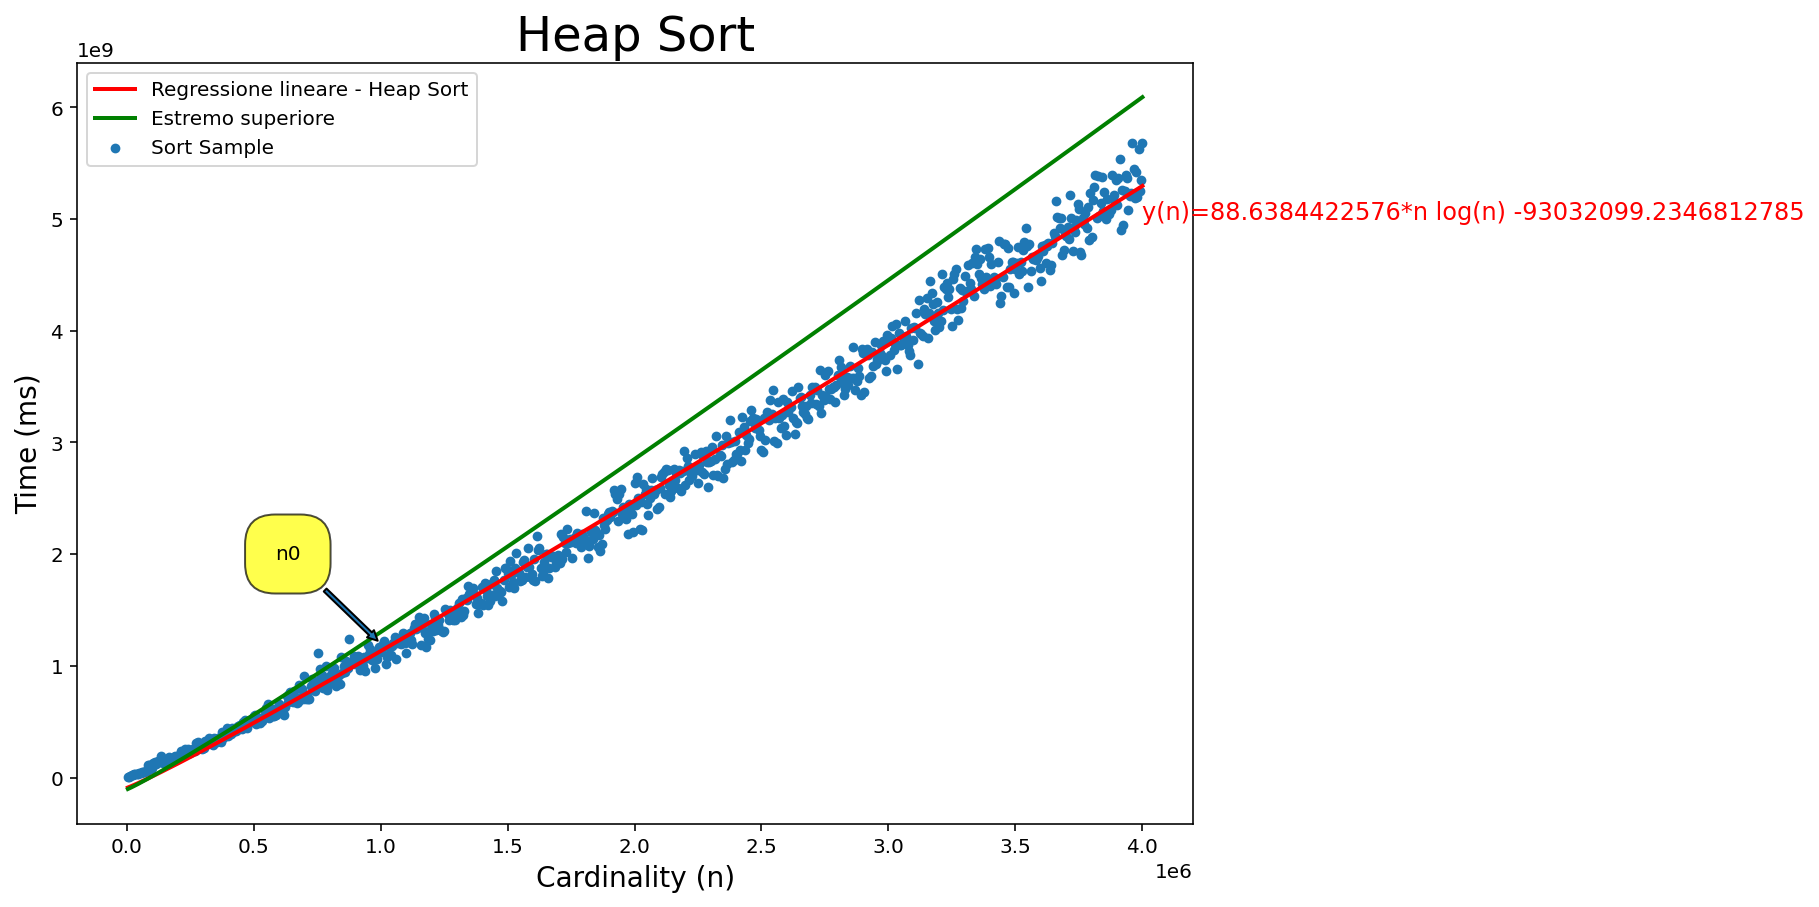

In [18]:
curveup=curvey*1.15
ax = df_heap_sort.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(10,7))

plt.plot(df_heap_sort['Card'],curvey,'r', linewidth=2)
plt.plot(df_heap_sort['Card'],curveup,'green', linewidth=2)
plt.text(4e6,5e9,'y(n)={:.10f}*n log(n) {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - Heap Sort','Estremo superiore','Sort Sample'])
plt.annotate(
        'n0',
        xy=(1e6, 1.2e9), xytext=(-40, 40),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=1.5', fc='yellow', alpha=0.7),
        arrowprops=dict(arrowstyle = 'simple', connectionstyle='arc3,rad=0'))
plt.title('Heap Sort', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ms)', size=14);

## Inserimento
Per effettuare l'inserimento in un Max-Heap, si inserisce un elemento con un valore di key fittizio per poi richiamare la funzione **HeapIncreaseKey**, la quale inserisce la chiave corretta e la fa "risalire" lungo l'albero se essa supera il valore del nodo padre. Essendo l'altezza dell'albero pari a $log(n)$, la complessità sarà, appunto, asintoticamente logaritmica.  

#### Codice C++

```c++
void HeapPriorityQueue::MaxHeapInsert(int key) {
	int HeapSize = heap_array.size();
	heap_array.push_back(-1);
//	HeapSize++;
	HeapIncreaseKey(HeapSize,key);
}


bool HeapPriorityQueue::HeapIncreaseKey(int i, int key) {
	if (key<heap_array[i]){
		return false;
	}
	heap_array[i]=key;
		
	while (i>0 && heap_array[Parent(i)]<heap_array[i]){
		
		heap_array[i] = heap_array[i]^heap_array[Parent(i)];
		heap_array[Parent(i)] = heap_array[i]^heap_array[Parent(i)];
		heap_array[i] = heap_array[i]^heap_array[Parent(i)];
		i = Parent(i);
	}
	return true;	
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di InsertMaxHeap, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[10, 4000000\right]$
- Passo di incremento della cardinalità: al fine di garantire una discreta visualizzazione grafica dell'andamento asintotico, si è scelto di variare il passo d'incremento della dimensione:
   - $unit=10$ per una cardinalità compresa tra 10 e 5000;
   - $unit=5000$ per una cardinalità compresa tra 5000 e 4000000;
- Numero di operazioni per ogni passo di cardinalità: $med=1$
- Iterazioni di operazione: $iter=800$

#### Rappresentazione grafica
Le informazioni riguardanti la cardinalità e il tempo risultante dall'operazione di mediana sono state poi rappresentate graficamente su un diagramma cartesiano per comprovare la complessità computazione dell'algoritmo.

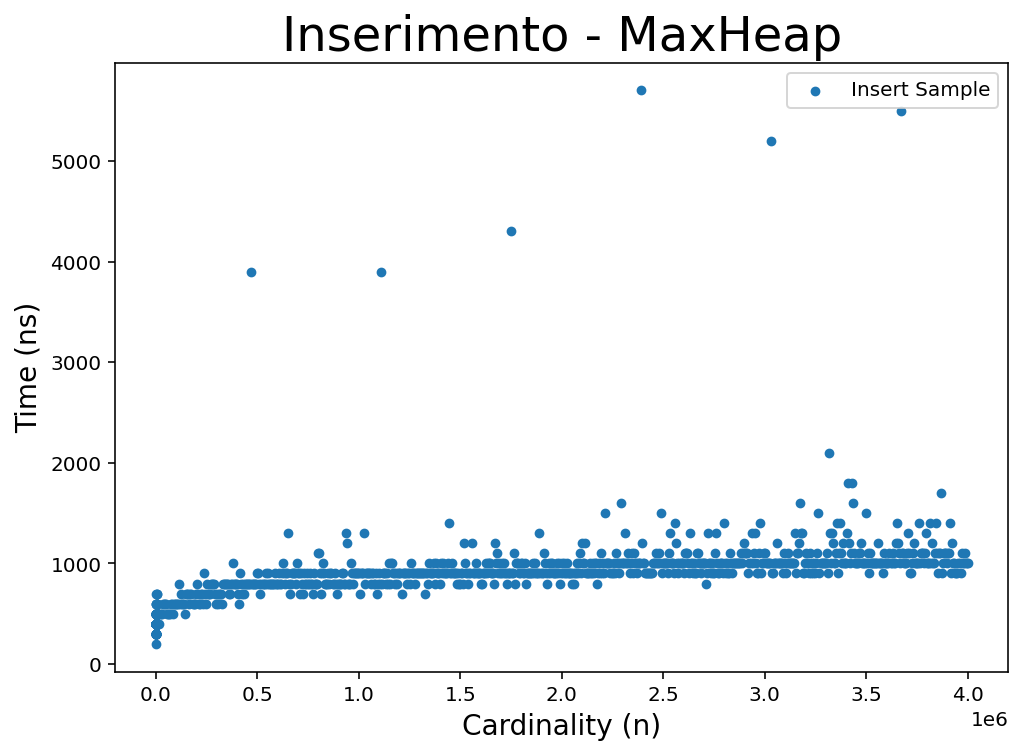

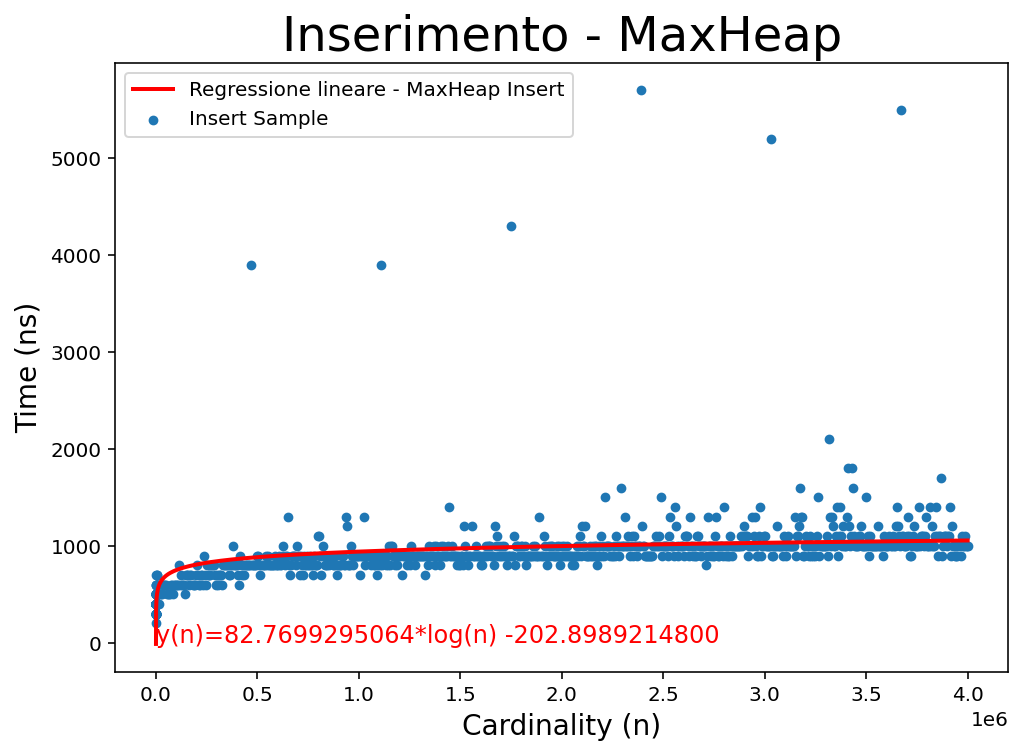

In [19]:
df_heap_isert = pd.read_csv(path+"/Heap_Insert.csv", sep = '\t')
df_heap_isert = df_heap_isert.drop(columns = ['Time2'])

ax = df_heap_isert.plot.scatter(x = 'Card', y = 'Time1', s = 15, figsize=(8,5.6))
plt.title('Inserimento - MaxHeap', size=24)
plt.legend(labels=['Insert Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14)


ax = df_heap_isert.plot.scatter(x = 'Card', y = 'Time1', s = 15, figsize=(8,5.6))

from scipy.optimize import curve_fit
def func(x, p1,p2):
  return p1*np.log(x)+p2

popt, pcov = curve_fit(func, df_heap_isert['Card'], df_heap_isert['Time1'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_heap_isert['Card'],p1,p2)

plt.plot(df_heap_isert['Card'],curvey,'r', linewidth=2)
plt.text(0,0,'y(n)={:.10f}*log(n) {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - MaxHeap Insert','Insert Sample'])
plt.title('Inserimento - MaxHeap', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

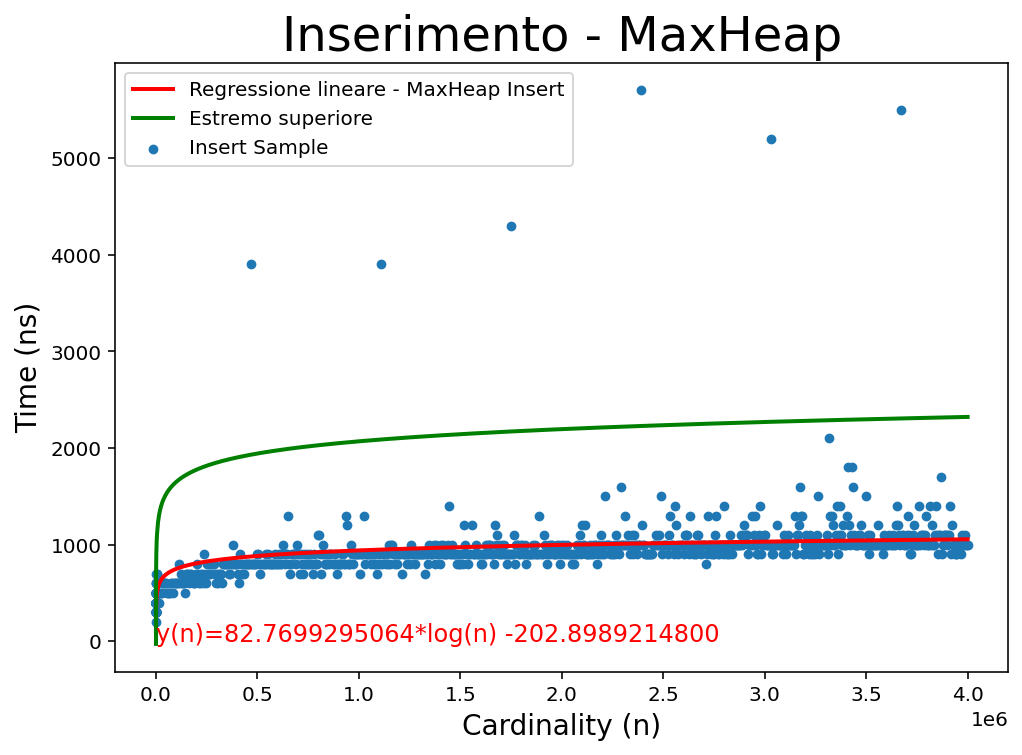

In [20]:
curveup=curvey*2.2
ax = df_heap_isert.plot.scatter(x = 'Card', y = 'Time1', s = 15, figsize=(8,5.6))

plt.plot(df_heap_isert['Card'],curvey,'r', linewidth=2)
plt.plot(df_heap_isert['Card'],curveup,'green', linewidth=2)
plt.text(0,0,'y(n)={:.10f}*log(n) {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - MaxHeap Insert','Estremo superiore','Insert Sample'])
plt.title('Inserimento - MaxHeap', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Anche in questo caso, la regressione logaritmica conferma l'andamento temporale asintotico ipotizzato teoricamente: l'inserimento prevede una complessità asintotica di $O(log(n))$, come evidenziato dalla curva in verde:<br>
<center>$0 < T(n) < c \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0 \;\;\;\; c=2.2$</center>


## Peek
L'operazione di restituzione del massimo in un Max-Heap è particolarmente efficiente: essendo un Max-Heap ordinato decrescentemente per definizione, è sufficiente restituire il primo elemento dell'array.

#### Codice C++

```c++
int HeapPriorityQueue::HeapMaximum() {
	return heap_array[0];
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di BuildMaxHeap, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[5000, 4000000\right]$
- Passo di incremento della cardinalità: $unit=5000$
- Numero di operazioni per ogni passo di cardinalità: $med=1$
- Iterazioni di operazione: $iter=800$

#### Rappresentazione grafica

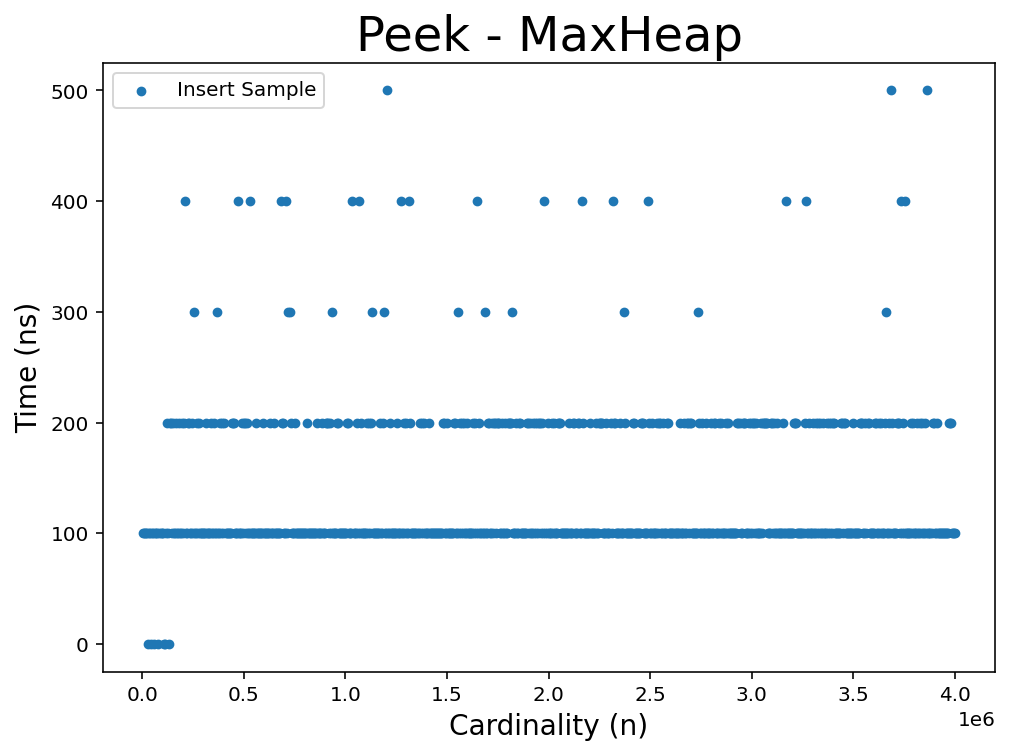

In [21]:
df_heap_peek = pd.read_csv(path+"/Heap_peek.csv", sep = '\t')
df_heap_peek = df_heap_peek.drop(columns = ['Time2'])

ax = df_heap_peek.plot.scatter(x = 'Card', y = 'Time1', s = 15, figsize=(8,5.6))
plt.title('Peek - MaxHeap', size=24)
plt.legend(labels=['Insert Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Per il peek risulta evidente come il tempo di esecuzione asintotico sia costante, quindi $O(1)$.

## Estrazione


#### Codice C++

```c++
int HeapPriorityQueue::HeapExtractMax() {
	int HeapSize = heap_array.size();
	if 	(HeapSize == 0){
		cout<<"Heap Vuoto.\n";
		return 0;
	}
	
	int max = heap_array[0];
	HeapSize--;
	heap_array[0]=heap_array[HeapSize];
	heap_array.pop_back();
	MaxHeapify(0, &HeapSize);
	return max;
}
```

#### Parametri di analisi
Al fine di effettuare un'analisi qualitativamente valida dell'operazione di BuildMaxHeap, si è scelto di impostare i seguenti parametri:
- Cardinalità del vettore: $Card \in \left[5000, 4000000\right]$
- Passo di incremento della cardinalità: $unit=5000$
- Numero di operazioni per ogni passo di cardinalità: $med=6$
- Iterazioni di operazione: $iter=800$

In questo modo, per ogni valore di cardinalità sono stati ottenuti 6 differenti misurazioni in termini di tempo, espresse in nanosecondi (ns). Di queste misurazioni, è stata calcolata la mediana non tenendo conto di eventuali misurazioni non veritiere (0.000 ns).

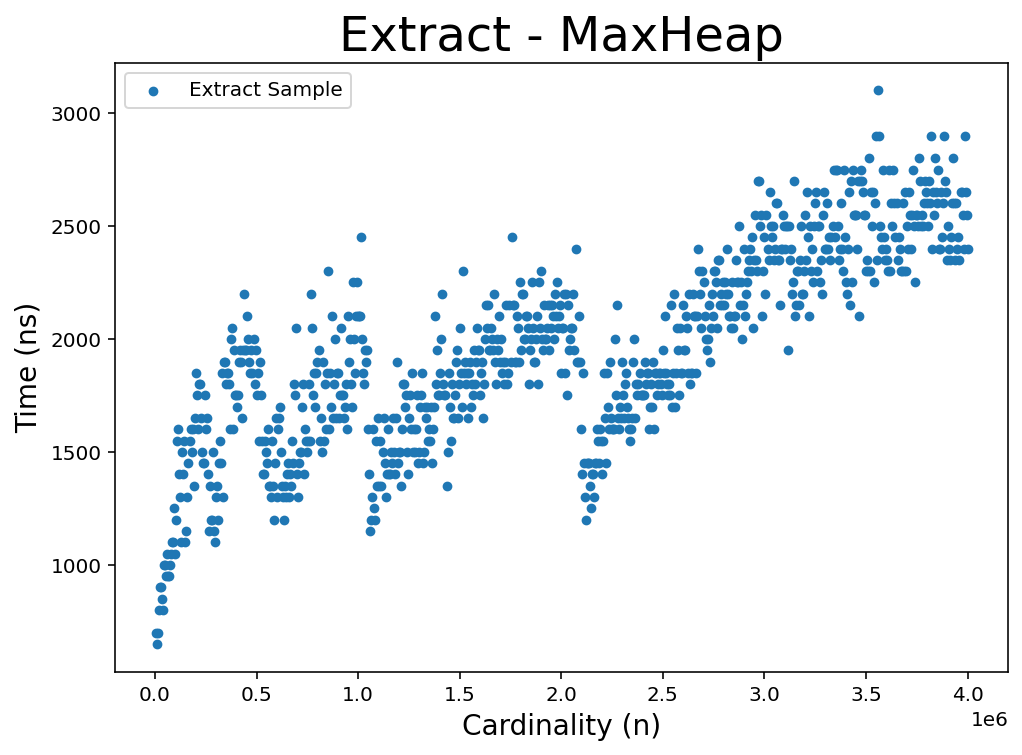

In [22]:
df_heap_ext= pd.read_csv(path+"/Heap_Extract.csv", sep = ';')


df_median2 = df_heap_ext.drop(columns = ['Card'])
df_median2 = df_median2.replace(to_replace=0.0, value='NaN')
df_median2 = df_median2.median(axis=1,  skipna = True)
df_heap_ext['Time_m'] = np.array(df_median2)

df_heap_ext = df_heap_ext.drop(columns = ['Time1','Time2','Time3', 'Time4', 'Time5', 'Time6'])

ax = df_heap_ext.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))
plt.title('Extract - MaxHeap', size=24)
plt.legend(labels=['Extract Sample'])
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

Effettuando una regressione logaritmica tramite la funzione:<br>
<center>$y = p_1 \cdot log(n) + p_2$</center>

si ottiene la curva in rosso, caratterizzata dai seguenti coefficienti:<br>
<center>$y(n) = 324.48358637975565 \cdot log(n) - 2654.10601529104$</center>

A questo punto, utilizzando il coefficiente:
- $c = 1.55$

e fissando un valore di n pari a:
- $n_0 = 0.5\cdot10^6$

ne consegue che l'andamento asintotico dell'algoritmo è compreso nella fascia:<br>
<center>$0 < T(n) < c \cdot y(n)\;\;\;\;\;\;\;\;\;\;\;\; \forall n > n_0$</center>

Da cui risulta che la complessità temporale asintotica di Extract - MaxHeap è $O(log(n))$.

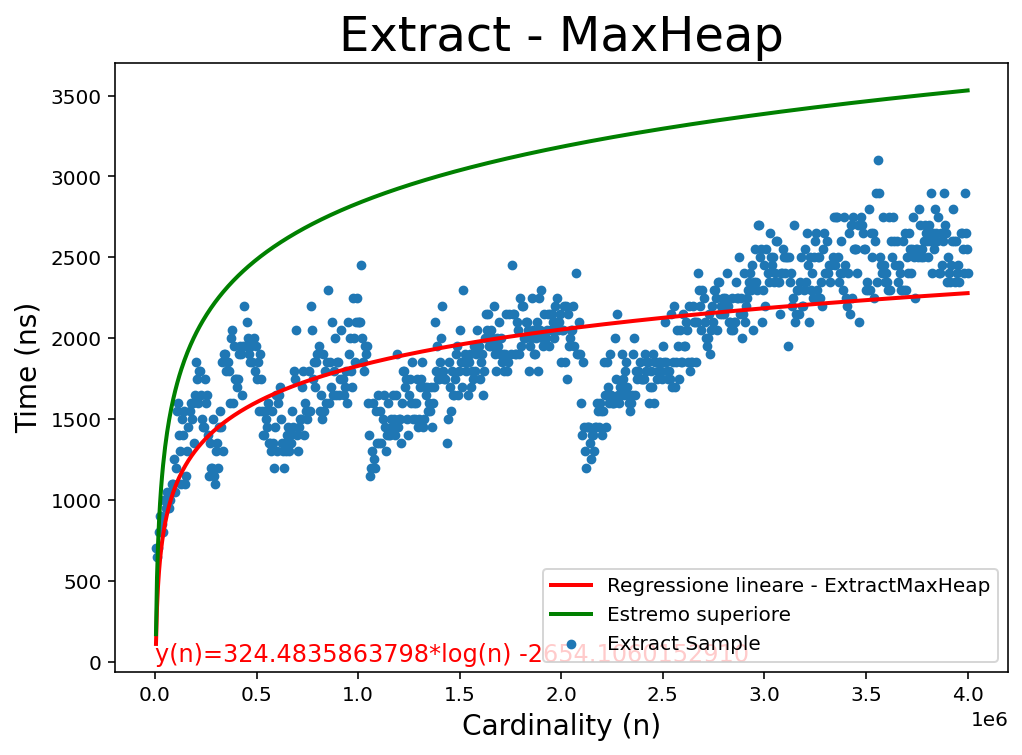

In [23]:
ax = df_heap_ext.plot.scatter(x = 'Card', y = 'Time_m', s = 15, figsize=(8,5.6))

from scipy.optimize import curve_fit
def func(x, p1,p2):
  return p1*np.log(x)+p2

popt, pcov = curve_fit(func, df_heap_ext['Card'], df_heap_ext['Time_m'])

p1 = popt[0]
p2 = popt[1]

curvey=func(df_heap_ext['Card'],p1,p2)
curveup=curvey*1.55

plt.plot(df_heap_ext['Card'],curvey,'r', linewidth=2)
plt.plot(df_heap_ext['Card'],curveup,'green', linewidth=2)
plt.text(0,0,'y(n)={:.10f}*log(n) {:.10f}'.format(p1,p2),color='red',size=12)
plt.legend(labels=['Regressione lineare - ExtractMaxHeap','Estremo superiore','Extract Sample'])
plt.title('Extract - MaxHeap', size=24)
plt.xlabel('Cardinality (n)', size=14)
plt.ylabel('Time (ns)', size=14);

# Conclusioni
Dall'analisi appena effettuata è possibile ricavrne una tabella in cui organizzare i risultati ottentuti:

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Operazione','Unsorted-Vector','Sorted-Vector','Max-Heap'],
                line_color='black',
                fill_color='silver',
                 font=dict(color='black', size=18),
                align='center'),
    cells=dict(values=[['Inserimento','Estrazione','Peek'],
                       ['$O(1)$','$O(n)$','$O(n)$'],
                       ['$\Theta(n)$','$\Theta(n)$','$O(1)$'],
                       ['$O(log(n))$','$O(log(n))$','$O(1)$']],
               line_color='black',
               font=dict(color='black', size=18),
               fill_color='white',
               align='center'))
])

fig.update_layout(width=900, height=400)
fig.show()

- Un **Unsorted Vector** può risultare efficiente esclusivamente in contesti in cui **le operazioni di inserimento sulla priority queue risultano essere molto maggiori delle operazioni di estrazione e peek**. 
- Un **Sorted Vector** risulta prestante nella casistica in cui **le operazioni di peek sono predominanti rispetto alle altre**.
- Un **Max-Heap** implementa efficientemente una priority queue in ogni circostanza: per inserimento ed estrazione, il tempo asintotico è un $O(log(n))$, complessivamente buono rispetto ai rispettivi casi di vettore ordinato e non. L'operazione di peek, invece impiega un tempo costante $O(1)$.